In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
netflix_overall=pd.read_csv("netflix_titles.csv")
netflix_overall.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [4]:
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [10]:
netflix_overall.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
netflix_overall.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [14]:
netflix_overall.shape

(8807, 12)

In [21]:
netflix_overall.duplicated().sum()

np.int64(0)

In [22]:
df = netflix_overall.copy()

In [23]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [24]:
df = df.dropna()

In [25]:
df.shape

(5332, 12)

In [26]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [27]:
df.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country          date_added  \
7   United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                      United Kingdom  September 24, 2021   
9                                       United States  September 24, 2021   
12                            Germany, Czech Republic  September 23, 2021   
24                                              India  September 21, 2021   

    release_year rating   duration  \
7           1993  TV-MA    125 min   
8           2021  TV-14  9 Seasons   
9           2021  PG-13    104 min   
12          2021  TV-MA    127 min   
24          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  
7   On a photo shoot in Ghana, an American model s...  
8   A talented batch of amateur bakers face off in...  
9   A woman adjusting to life after a loss contend...  
12  After most of her family is murdered in a terr...  
24  When the father of the man she loves insists t...

In [29]:
df["date_added"] = pd.to_datetime(df['date_added'].str.strip())
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
df['year_added'].astype(int)
df['day_added'].astype(int)

In [31]:
df.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country date_added  \
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
8                                      United Kingdom 2021-09-24   
9                                       United States 2021-09-24   
12                            Germany, Czech Republic 2021-09-23   
24                                              India 2021-09-21   

    release_year rating   duration  \
7           1993  TV-MA    125 min   
8           2021  TV-14  9 Seasons   
9           2021  PG-13    104 min   
12          2021  TV-MA    127 min   
24          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  day_added  year_added  \
7   On a photo shoot in Ghana, an American model s...         24        2021   
8   A talented batch of amateur bakers face off in...         24        2021   
9   A woman adjusting to life after a loss contend...         24        2021   
12  After most of her family is murdered in a terr...         23        2021   
24  When the father of the man she loves insists t...         21        2021   

    month_added  
7             9  
8             9  
9             9  
12            9  
24            9

Text(0.5, 1.0, 'Type')

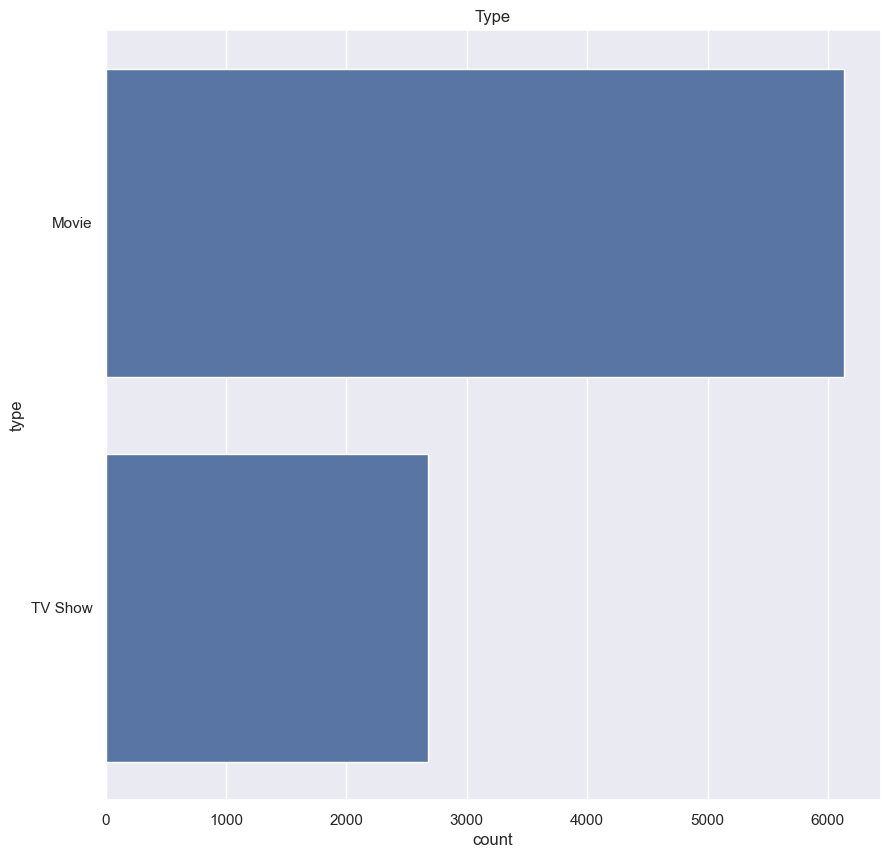

In [ ]:
sns.countplot(netflix_overall['type']  )
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

In [35]:
df.head()

show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country date_added  \
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
8                                      United Kingdom 2021-09-24   
9                                       United States 2021-09-24   
12                            Germany, Czech Republic 2021-09-23   
24                                              India 2021-09-21   

    release_year rating   duration  \
7           1993  TV-MA    125 min   
8           2021  TV-14  9 Seasons   
9           2021  PG-13    104 min   
12          2021  TV-MA    127 min   
24          1998  TV-14    166 min   

                                           listed_in  \
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   
24   Comedies, International Movies, Romantic Movies   

                                          description  day_added  year_added  \
7   On a photo shoot in Ghana, an American model s...         24        2021   
8   A talented batch of amateur bakers face off in...         24        2021   
9   A woman adjusting to life after a loss contend...         24        2021   
12  After most of her family is murdered in a terr...         23        2021   
24  When the father of the man she loves insists t...         21        2021   

    month_added  
7             9  
8             9  
9             9  
12            9  
24            9

C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\3574785879.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(netflix_overall['rating']).set_xticklabels(sns.countplot(netflix_overall['rating']).get_xticklabels(), rotation=90, ha="right")


Text(0.5, 1.0, 'Rating')

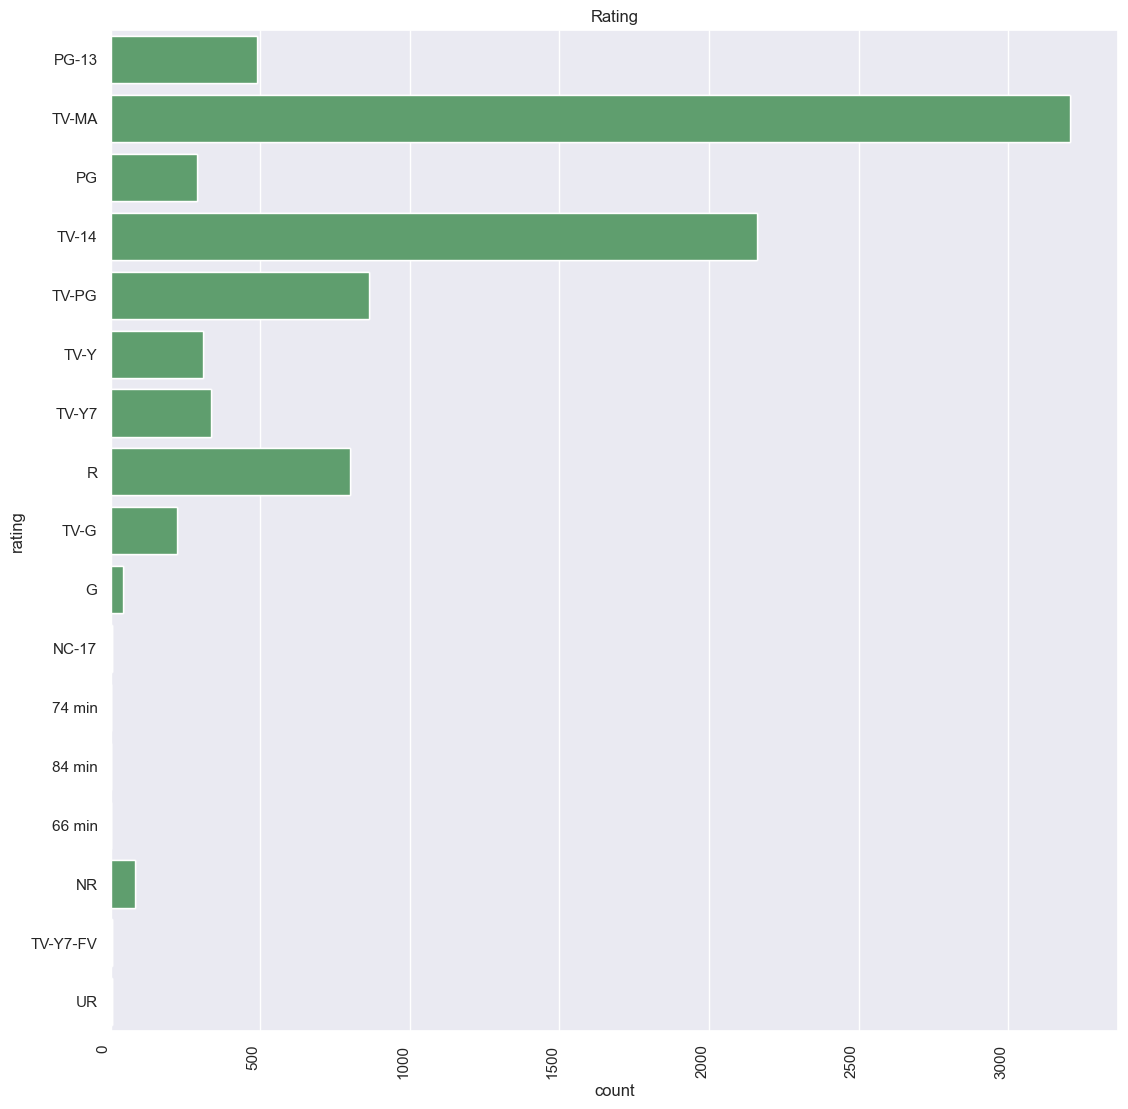

In [38]:
sns.countplot(netflix_overall['rating'])
sns.countplot(netflix_overall['rating']).set_xticklabels(sns.countplot(netflix_overall['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

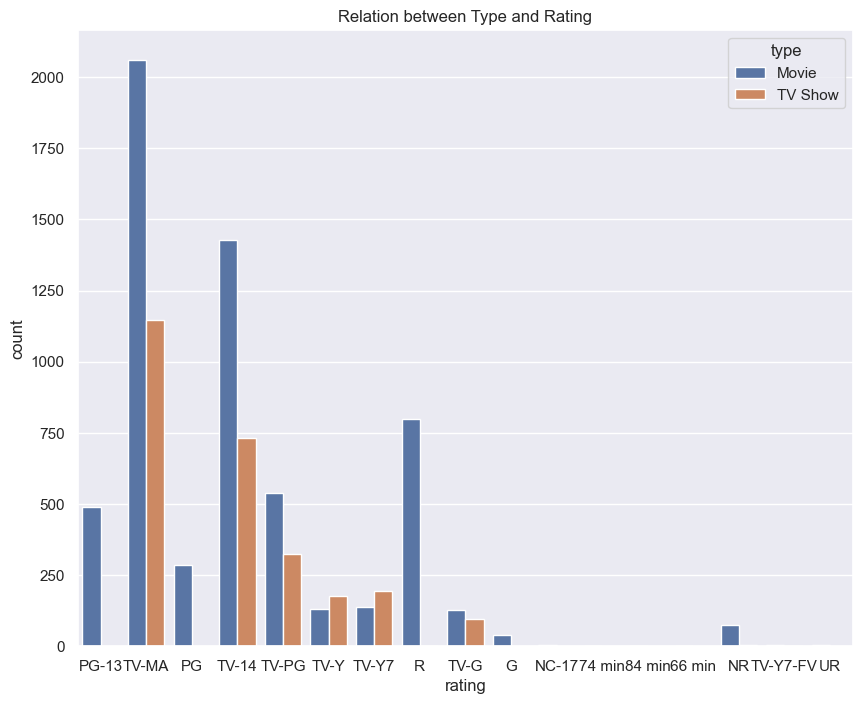

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix_overall)
plt.title('Relation between Type and Rating')
plt.show()

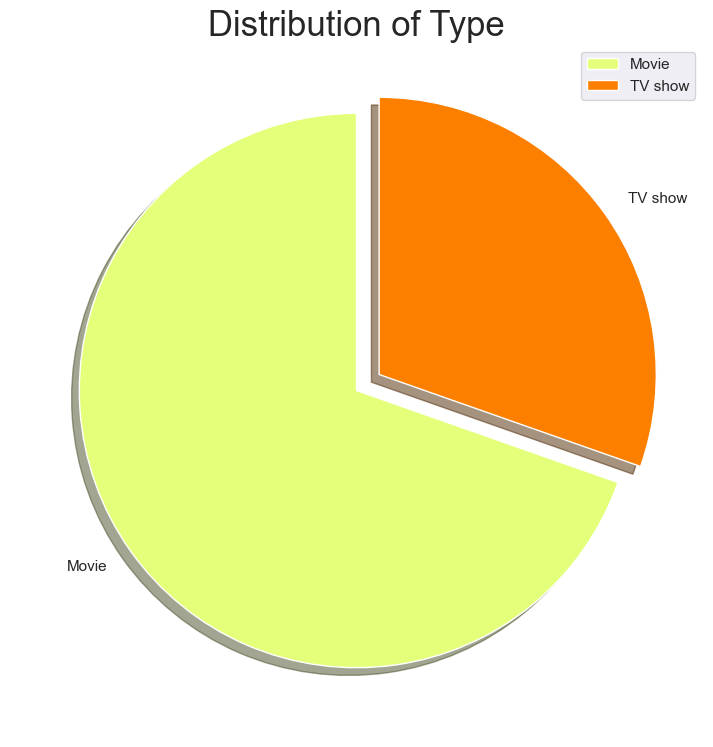

In [40]:
labels = ['Movie', 'TV show']
size = netflix_overall['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

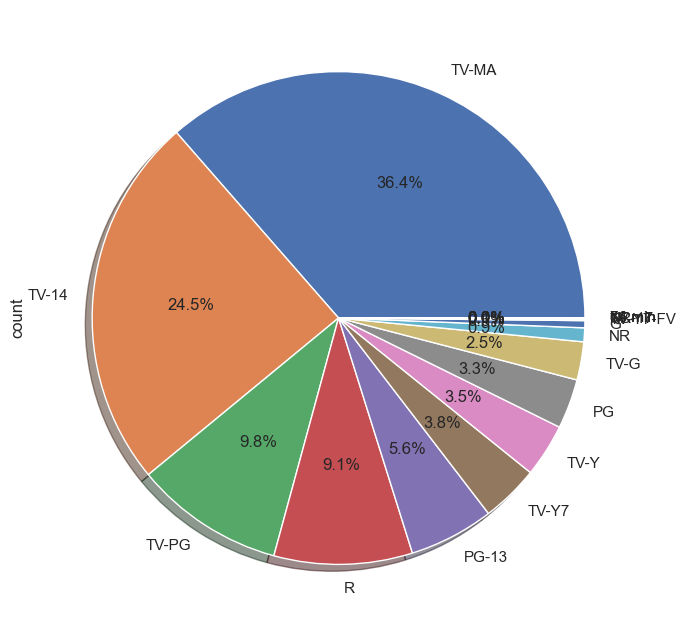

In [42]:
netflix_overall['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

WordCloud


In [43]:
from wordcloud import WordCloud

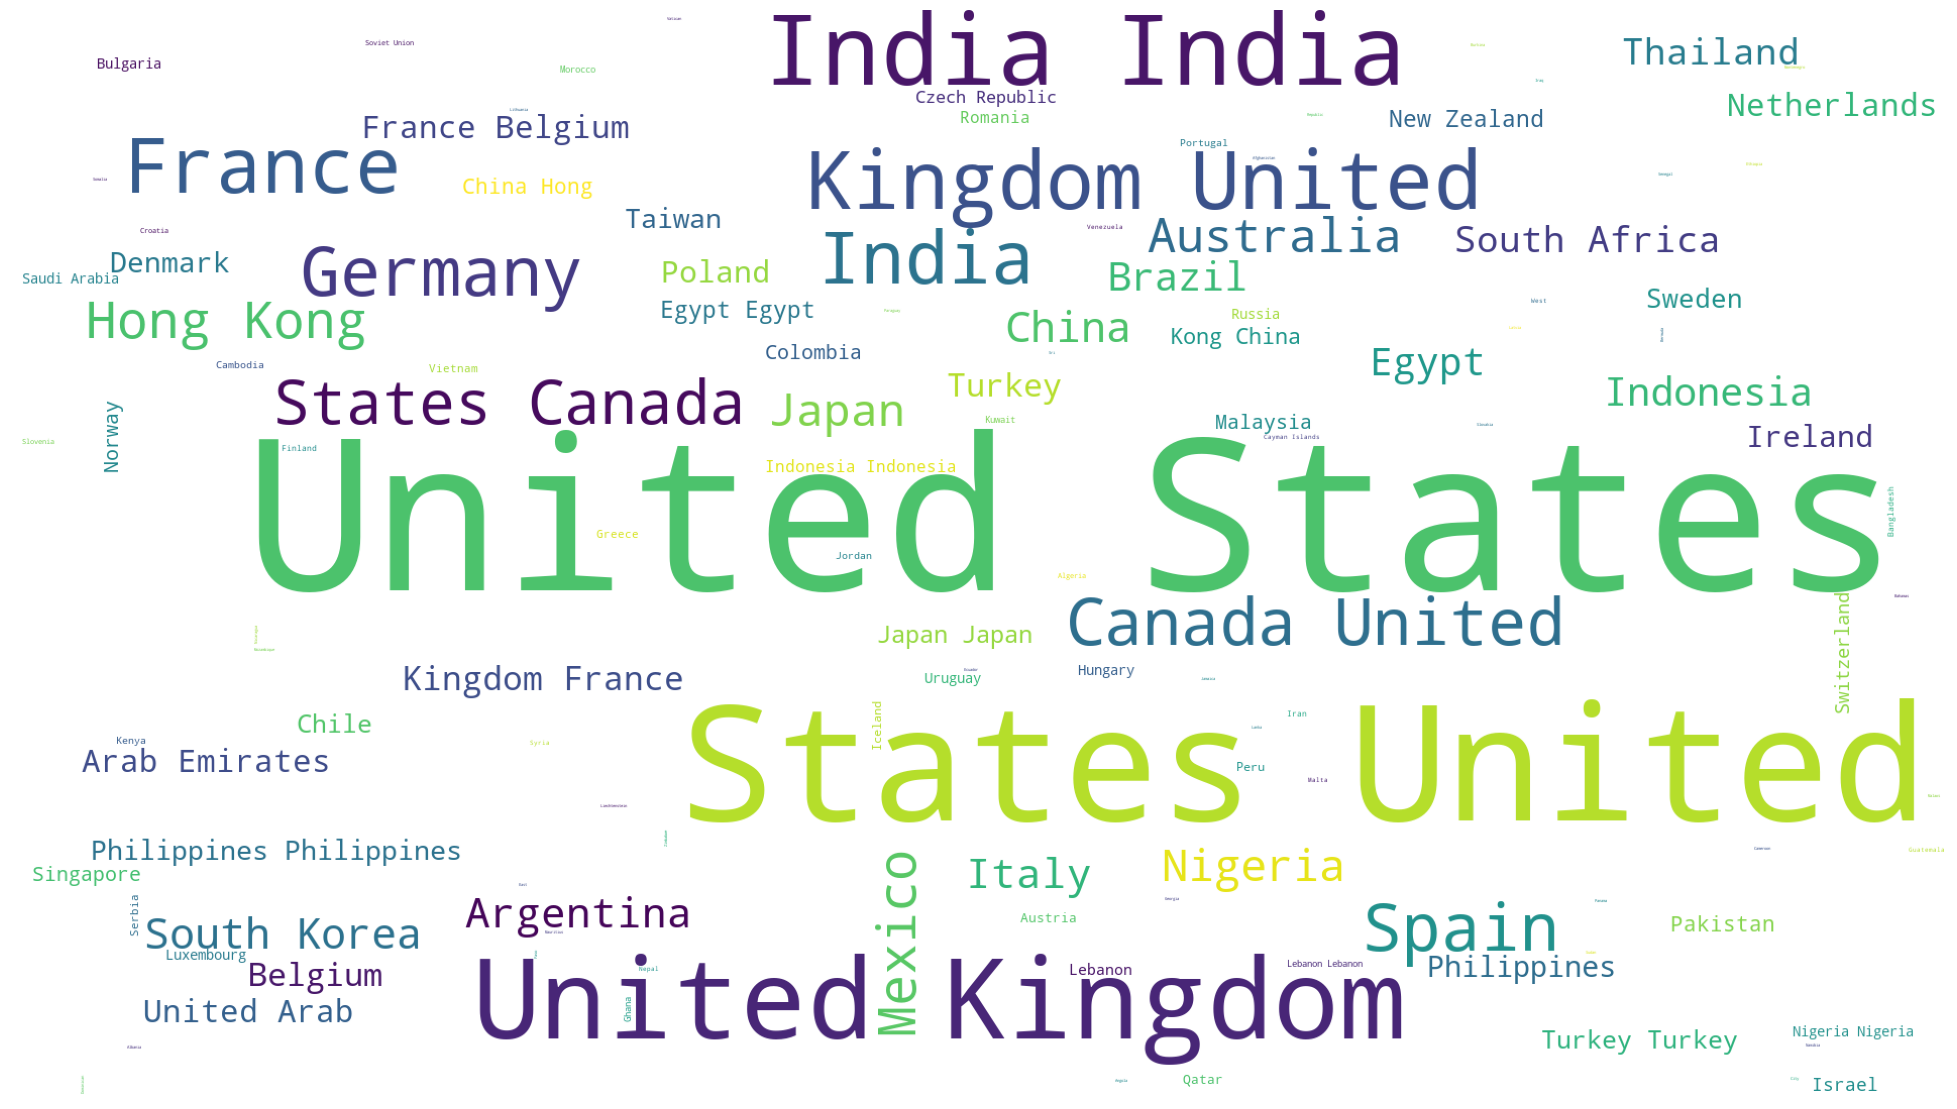

In [44]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()


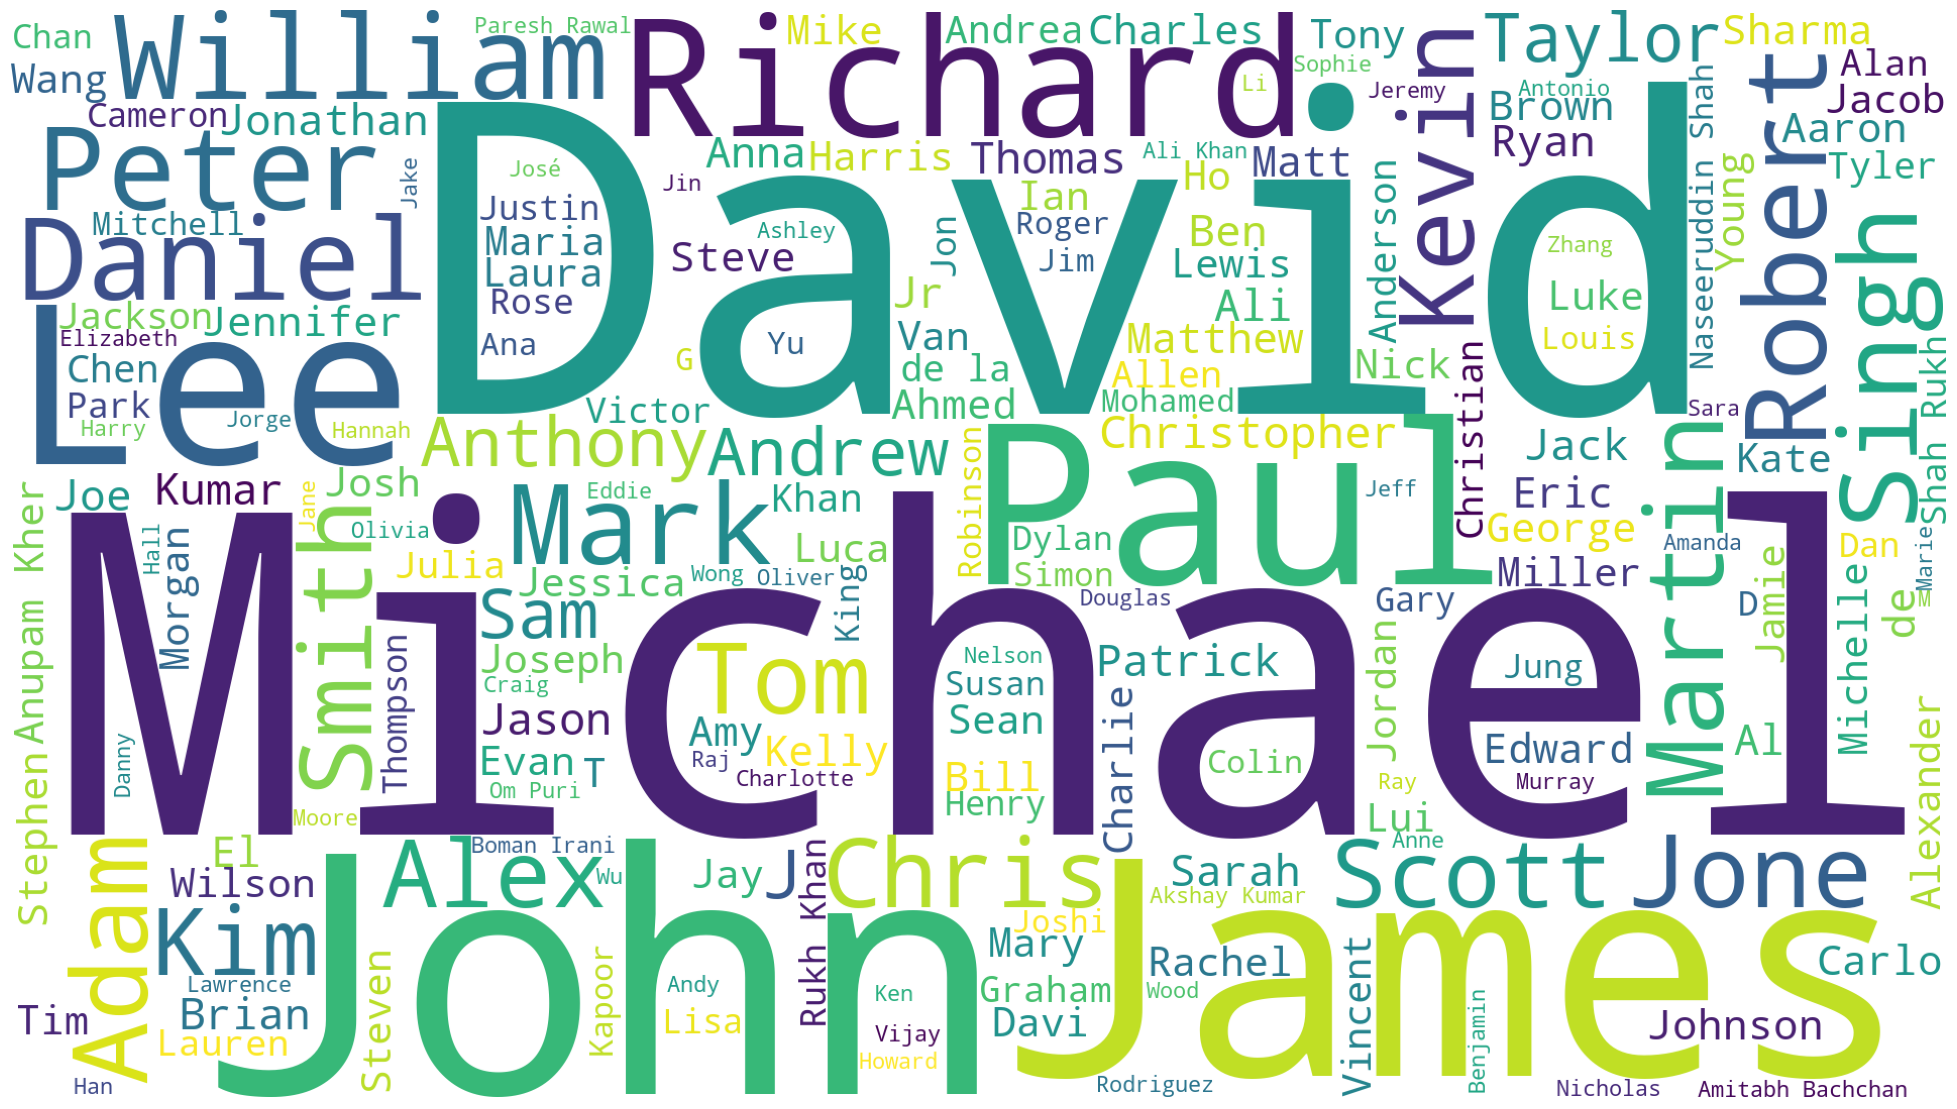

In [45]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

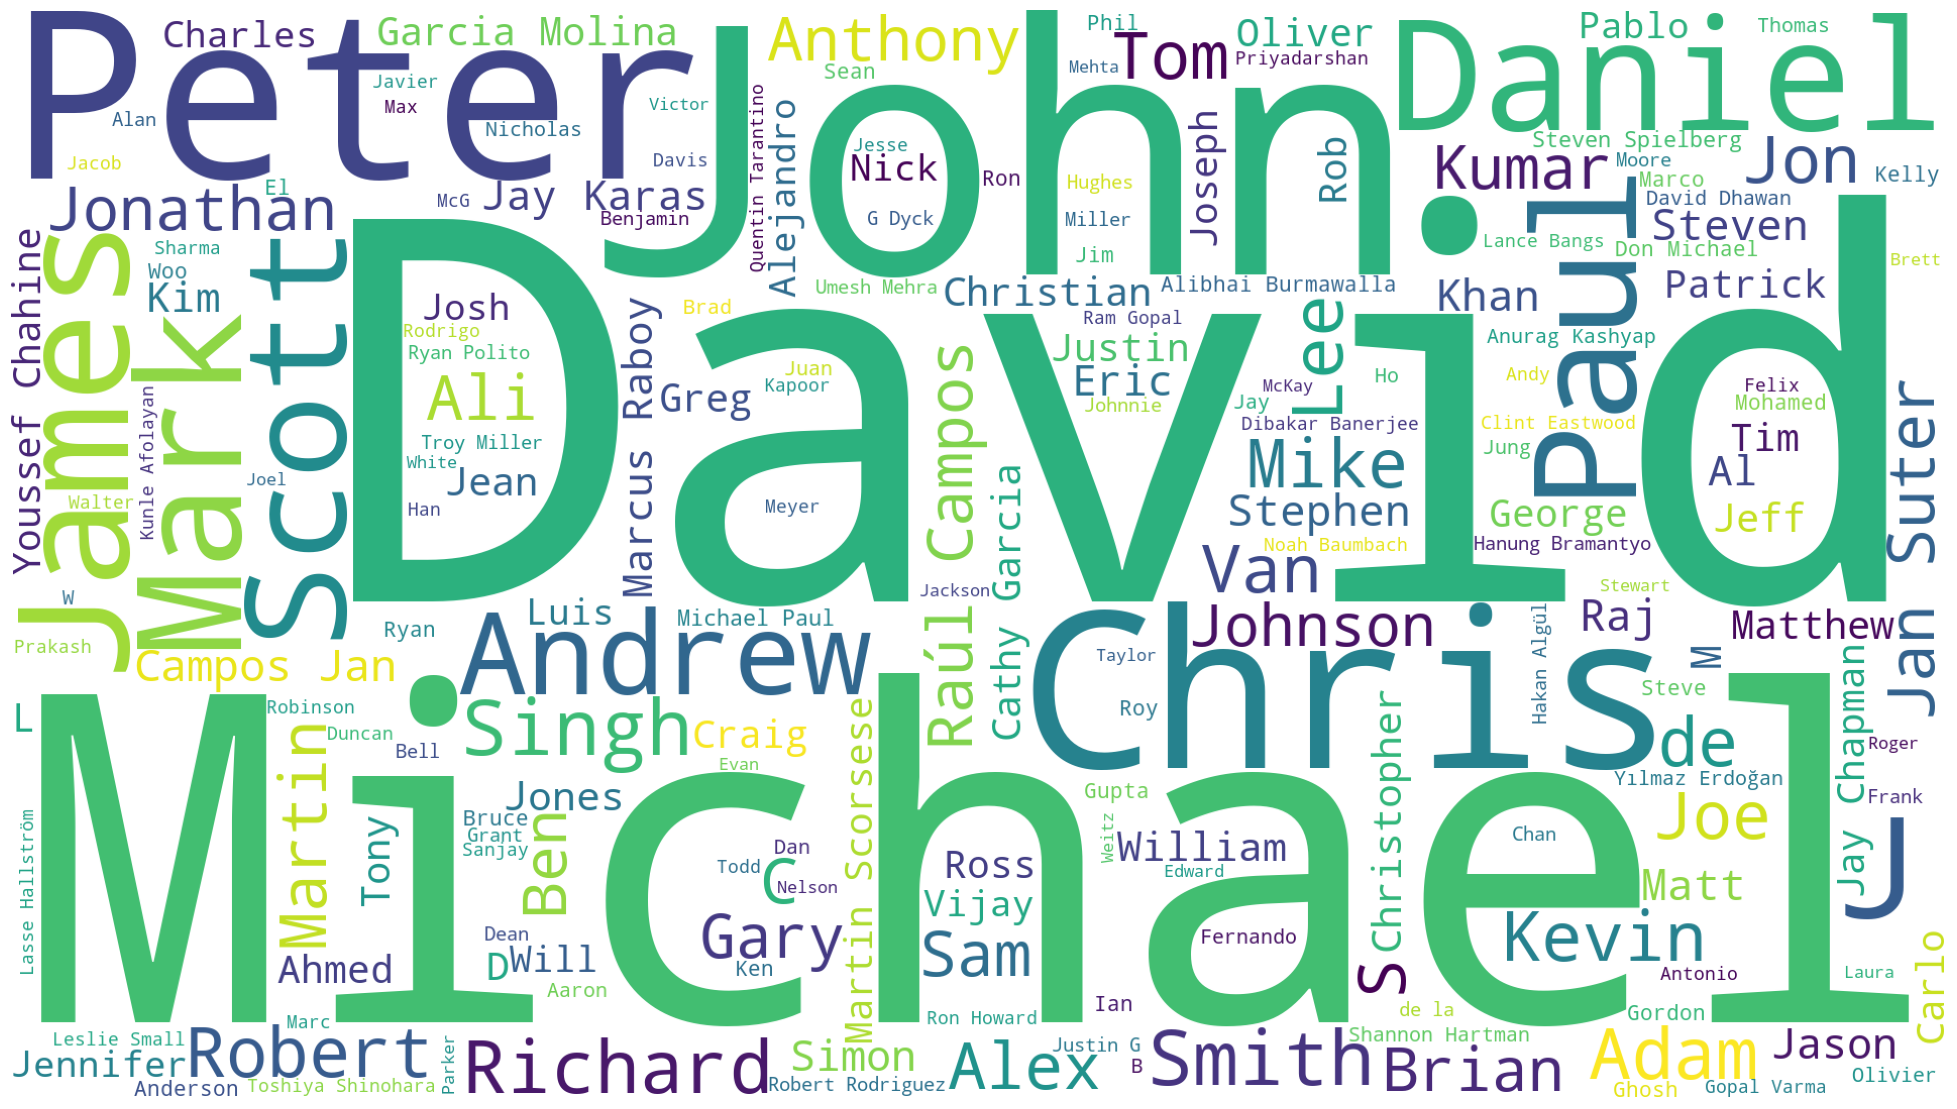

In [46]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

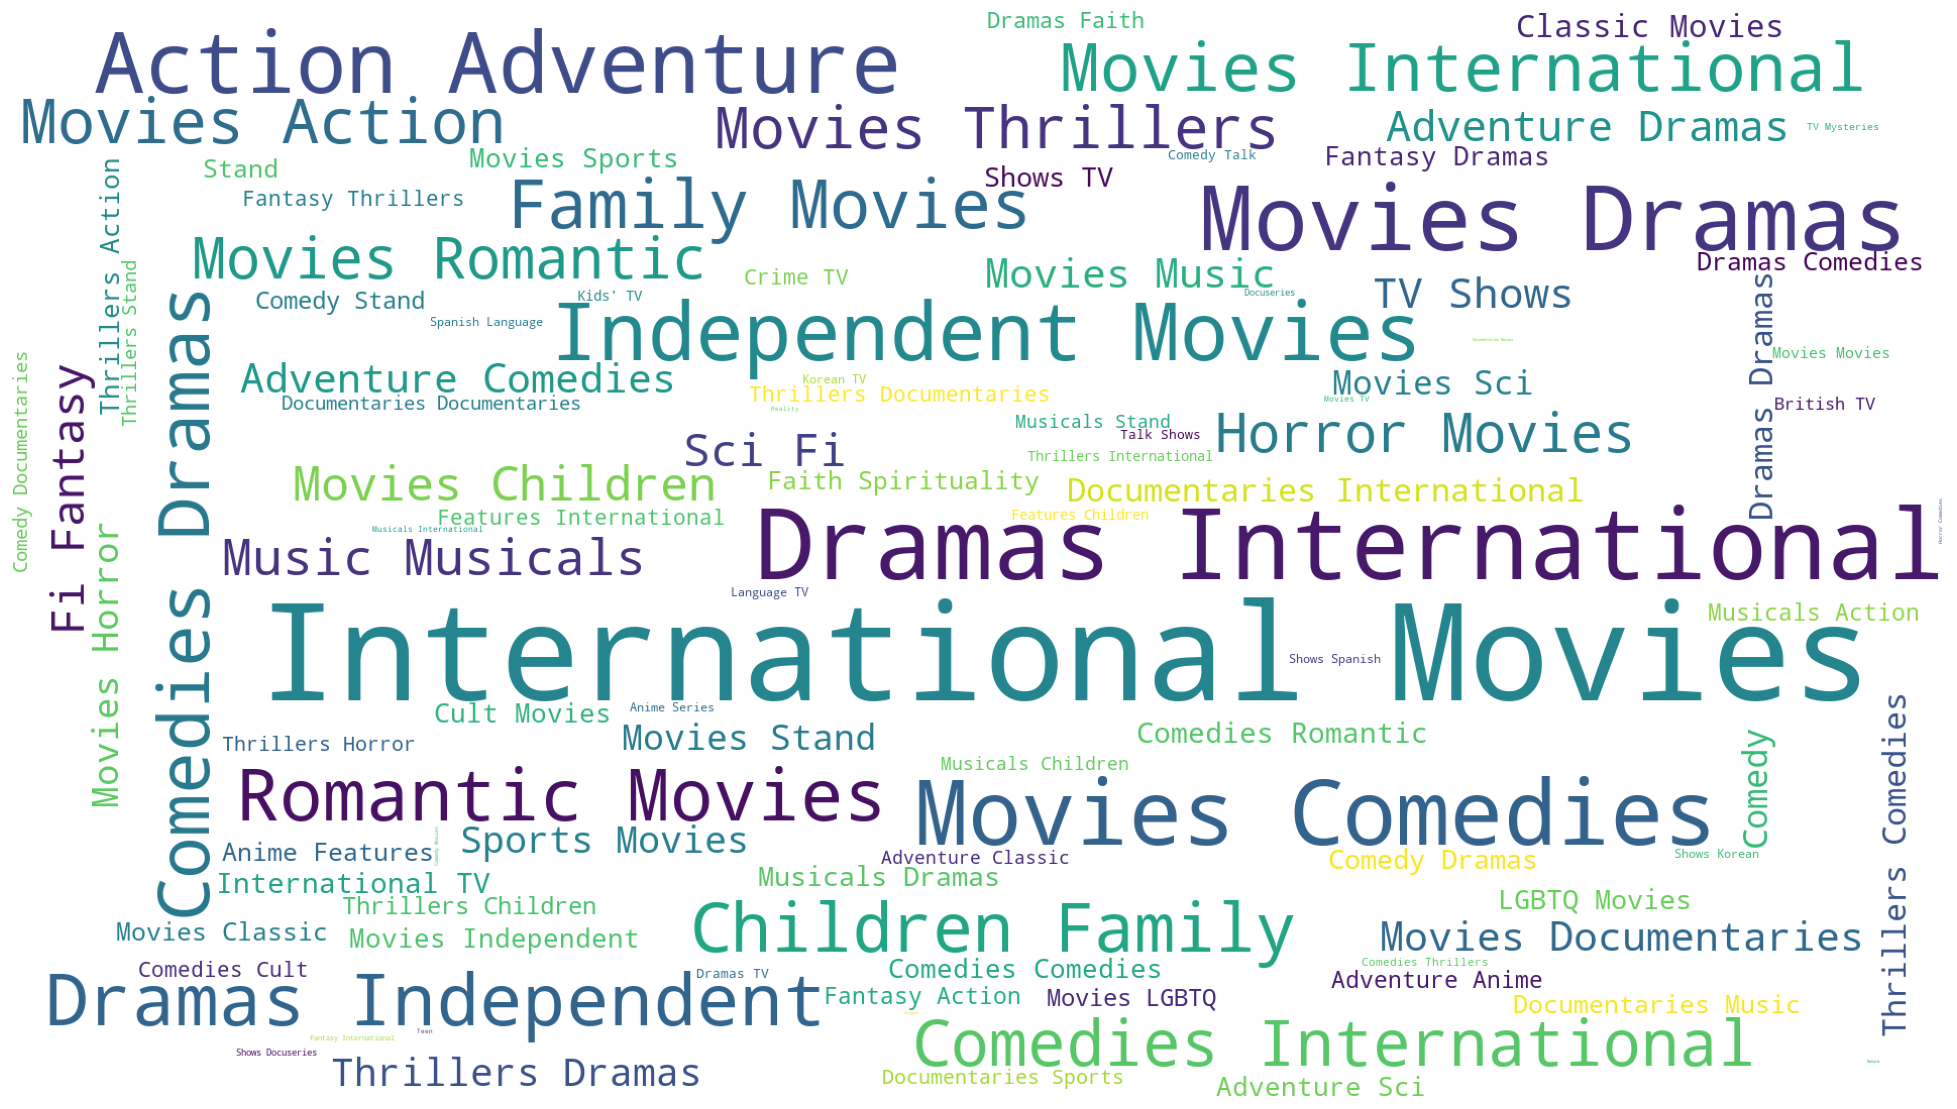

In [47]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

In [50]:
plt.figure(figsize=(12, 6))
netflix_overall.groupby(['year_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Number of TV Shows and Movies Added Over Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type')
plt.grid(True)
plt.show()

KeyError: 'year_added'

<Figure size 1200x600 with 0 Axes>

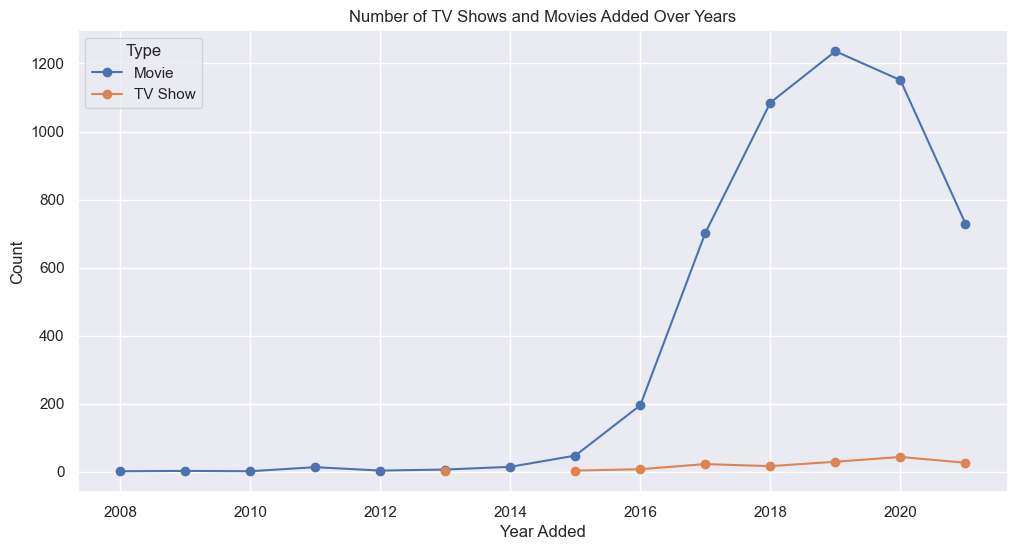

In [53]:
plt.figure(figsize=(12, 6))
df
.groupby(['year_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Number of TV Shows and Movies Added Over Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.legend(title='Type')
plt.grid(True)
plt.show()

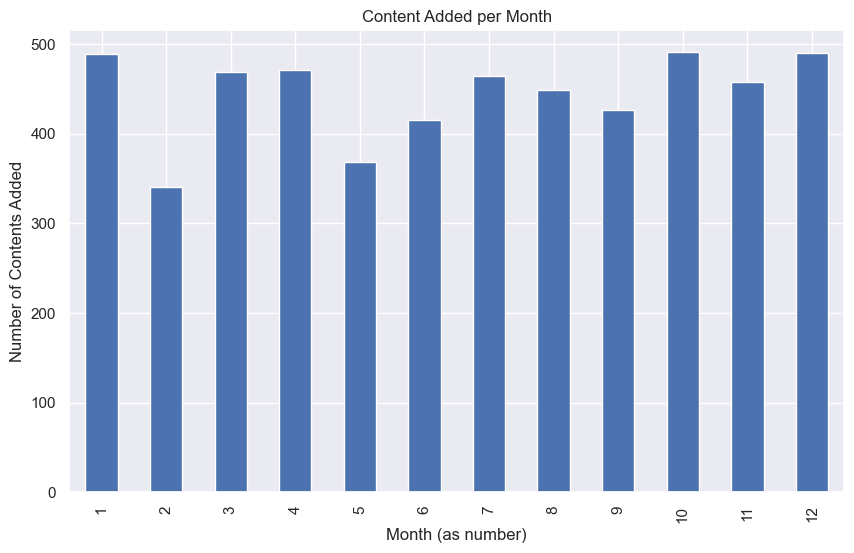

In [54]:
plt.figure(figsize=(10,6))
df['month_added'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month (as number)')
plt.ylabel('Number of Contents Added')
plt.title('Content Added per Month')
plt.show()

In [57]:
# Find the oldest release year in the dataframe
oldest_year = df['release_year'].min()

# Filter movies with the oldest release year
oldest_movies = df[(df['type'] == 'Movie') & (df['release_year'] == oldest_year)][['title', 'release_year']]

# Display the list of oldest movies and their release years
oldest_movies

title  release_year
8205  The Battle of Midway          1942

In [58]:
# Find the oldest release year for TV Shows
oldest_tv_year = df[df['type'] == 'TV Show']['release_year'].min()

# Filter TV Shows with the oldest release year
oldest_tv_shows = df[(df['type'] == 'TV Show') & (df['release_year'] == oldest_tv_year)][['title', 'release_year']]

# Display the list of oldest TV Shows and their release years
oldest_tv_shows

title  release_year
7175  Ken Burns: The Civil War          1990

In [59]:
# Display all oldest movies (with the minimum release year)
oldest_movies = df[(df['type'] == 'Movie') & (df['release_year'] == oldest_year)][['title', 'release_year']]
oldest_movies

title  release_year
8205  The Battle of Midway          1942

C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\881342323.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


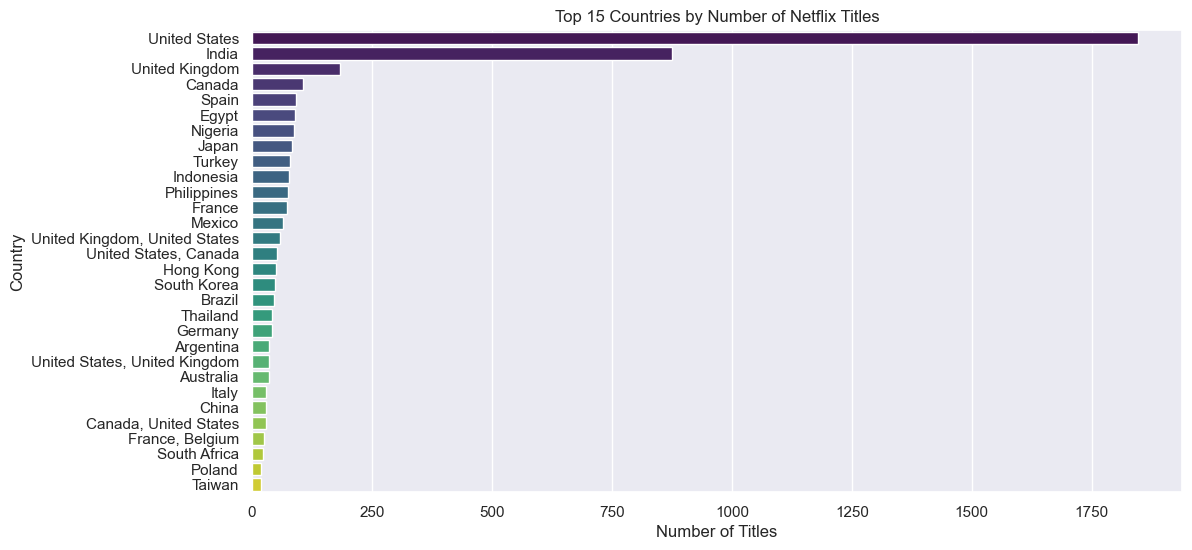

In [63]:
# Count the number of contents from each country in the cleaned dataframe
country_counts = df['country'].value_counts().head(30)

plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 15 Countries by Number of Netflix Titles')
plt.show()

C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\2193576897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='mako')


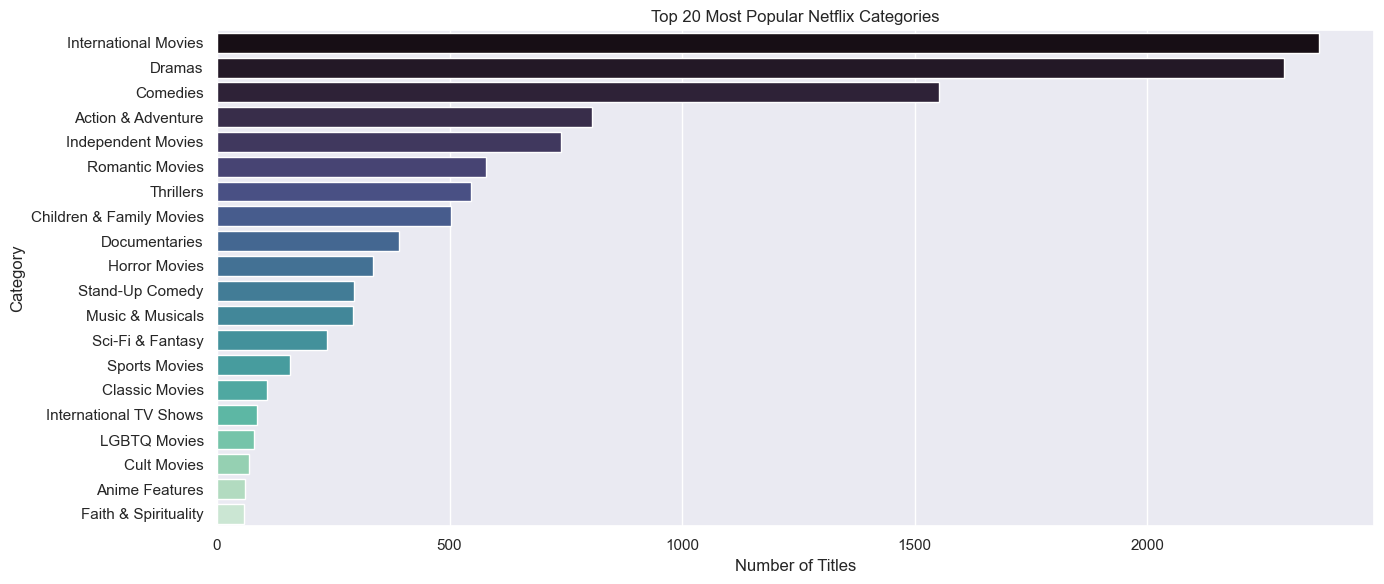

In [64]:
plt.figure(figsize=(14,6))
category_counts = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(20)
sns.barplot(x=category_counts.values, y=category_counts.index, palette='mako')
plt.xlabel('Number of Titles')
plt.ylabel('Category')
plt.title('Top 20 Most Popular Netflix Categories')
plt.tight_layout()
plt.show()

In [ ]:
top_actors_by_country = {}

# Get the first 6 countries from country_counts
top_countries = country_counts.index[:6]

for country in top_countries:
    # Filter rows for the country (may be multiple countries per row, so use str.contains)
    country_df = df[df['country'].str.contains(country, na=False)]
    # Split cast by comma, stack, and count
    actors = country_df['cast'].dropna().str.split(', ').explode()
    top_actors = actors.value_counts().head(5)
    top_actors_by_country[country] = top_actors

for country, actors in top_actors_by_country.items():
    print(f"Top actors in {country}:\n{actors}\n")

C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\2462632109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='mako')


Text(0.5, 1.0, 'Top 20 Most Popular Actors on Netflix')

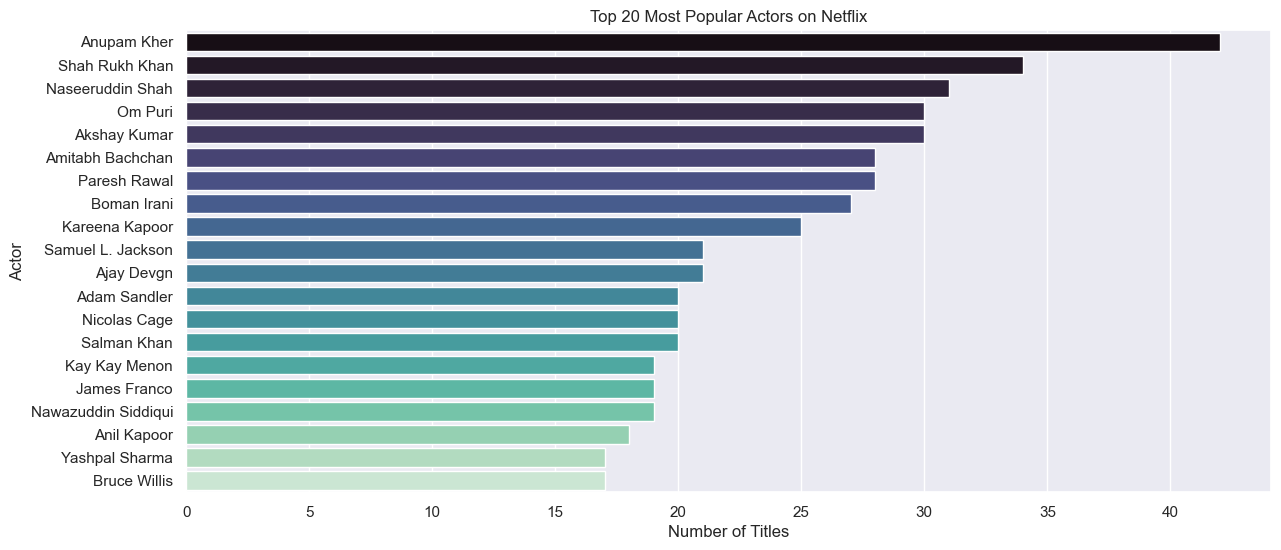

In [65]:
top_actors = df['cast'].str.split(', ', expand=True).stack().value_counts().head(20)
plt.figure(figsize=(14,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='mako')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.title('Top 20 Most Popular Actors on Netflix')

C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\3972423138.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_india_actors.values, y=top_india_actors.index, ax=axes[0], palette='crest')
C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\3972423138.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_us_actors.values, y=top_us_actors.index, ax=axes[1], palette='mako')
C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\3972423138.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_uk_actors.values, y=top_uk_actors.index, ax=a

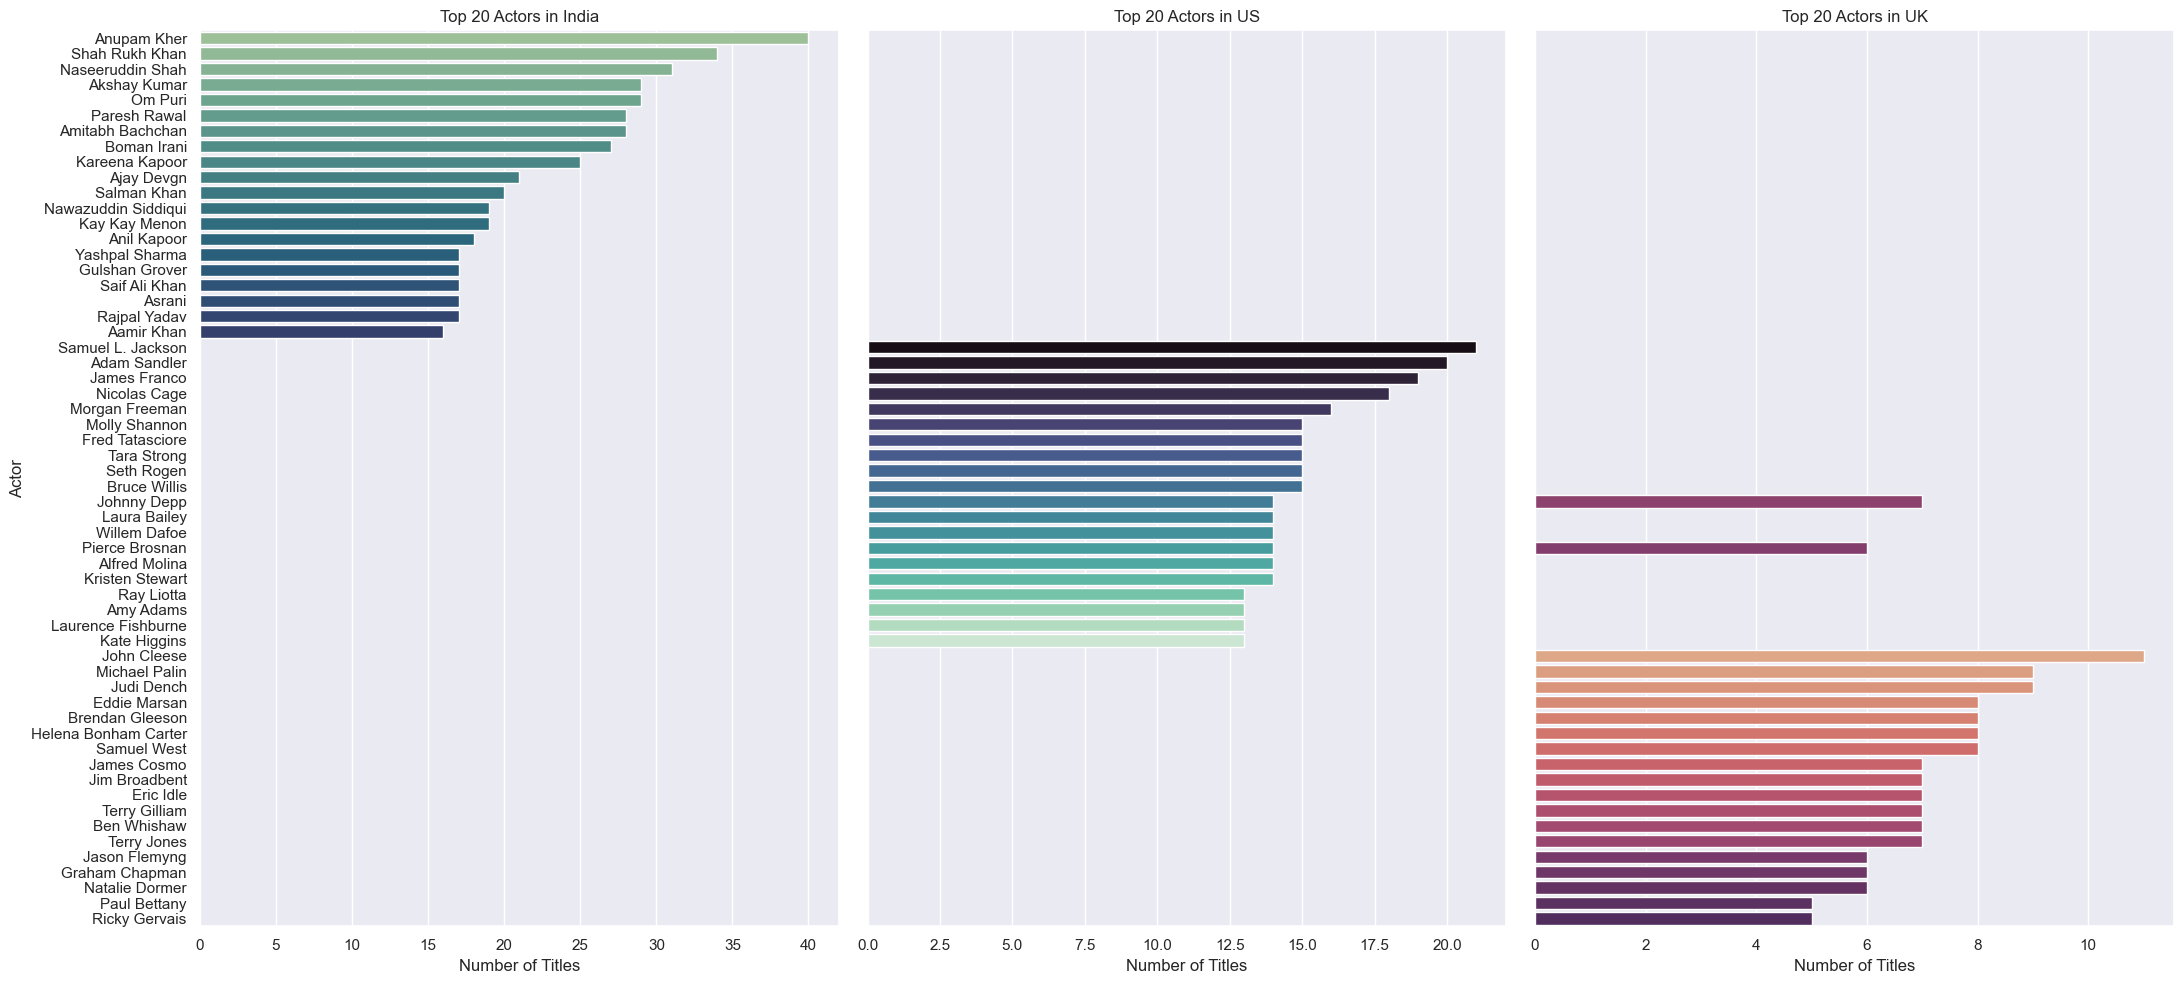

In [67]:
# Get top 20 actors for India, US, and UK
india_actors = df[df['country'].str.contains('India', na=False)]['cast'].dropna().str.split(', ').explode()
top_india_actors = india_actors.value_counts().head(20)

us_actors = df[df['country'].str.contains('United States', na=False)]['cast'].dropna().str.split(', ').explode()
top_us_actors = us_actors.value_counts().head(20)

uk_actors = df[df['country'].str.contains('United Kingdom', na=False)]['cast'].dropna().str.split(', ').explode()
top_uk_actors = uk_actors.value_counts().head(20)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(22, 10), sharey=True)

sns.barplot(x=top_india_actors.values, y=top_india_actors.index, ax=axes[0], palette='crest')
axes[0].set_title('Top 20 Actors in India')
axes[0].set_xlabel('Number of Titles')
axes[0].set_ylabel('Actor')

sns.barplot(x=top_us_actors.values, y=top_us_actors.index, ax=axes[1], palette='mako')
axes[1].set_title('Top 20 Actors in US')
axes[1].set_xlabel('Number of Titles')
axes[1].set_ylabel('')

sns.barplot(x=top_uk_actors.values, y=top_uk_actors.index, ax=axes[2], palette='flare')
axes[2].set_title('Top 20 Actors in UK')
axes[2].set_xlabel('Number of Titles')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\2352674392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_india_directors.values, y=top_10_india_directors.index, palette='crest')


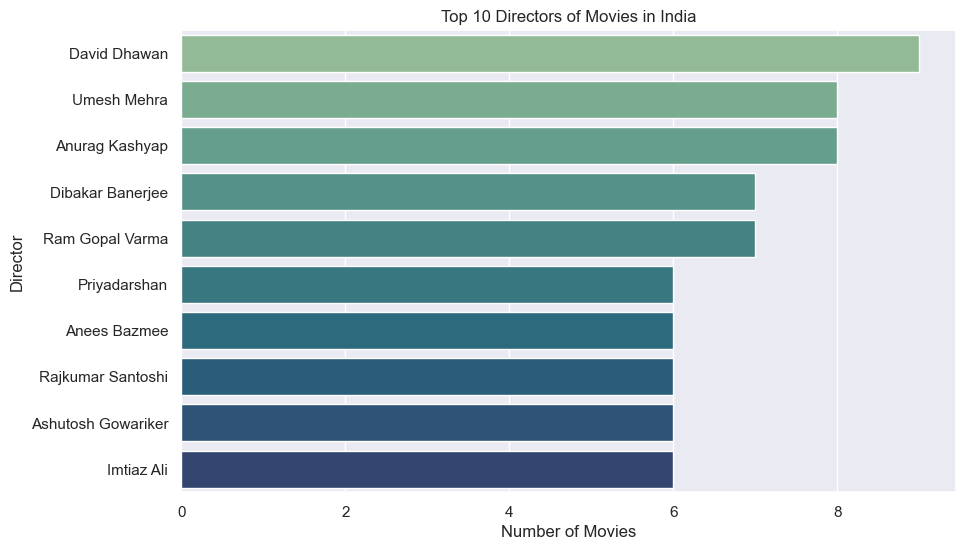

In [69]:
# Get top 10 directors for movies in India
india_movie_directors = df[(df['type'] == 'Movie') & (df['country'].str.contains('India', na=False))]
top_10_india_directors = india_movie_directors['director'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_india_directors.values, y=top_10_india_directors.index, palette='crest')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Top 10 Directors of Movies in India')
plt.show()

C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\3859205400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_directors.values, y=top_20_directors.index, palette='crest')


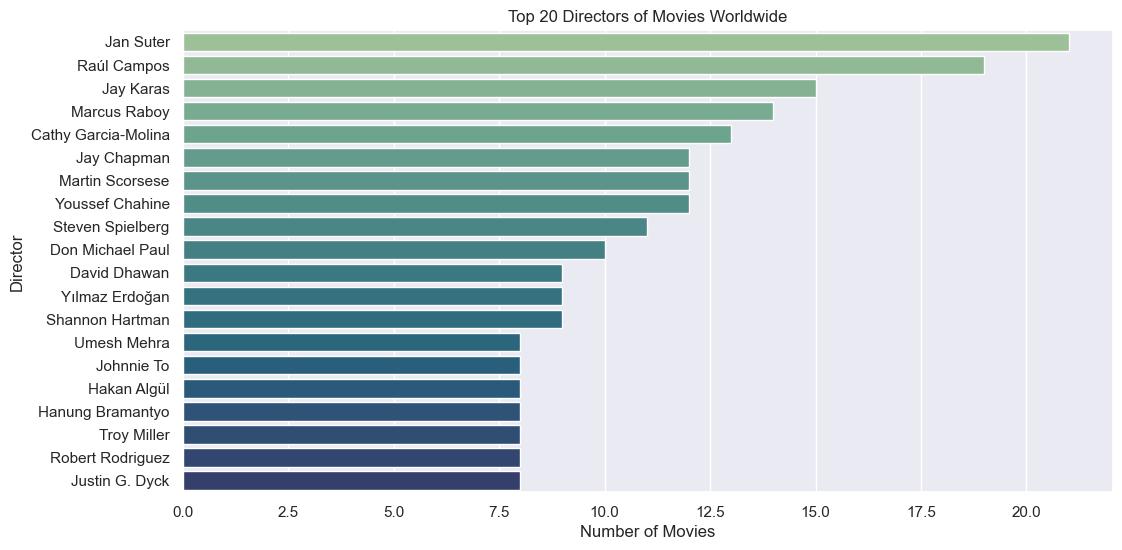

In [70]:
# Get top 20 directors for movies worldwide
top_20_directors = df[df['type'] == 'Movie']['director'].dropna().str.split(', ').explode().value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_20_directors.values, y=top_20_directors.index, palette='crest')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.title('Top 20 Directors of Movies Worldwide')
plt.show()

C:\Users\INDIA\AppData\Local\Temp\ipykernel_5928\1297532416.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tv_show_actors.values, y=top_tv_show_actors.index, palette='mako')


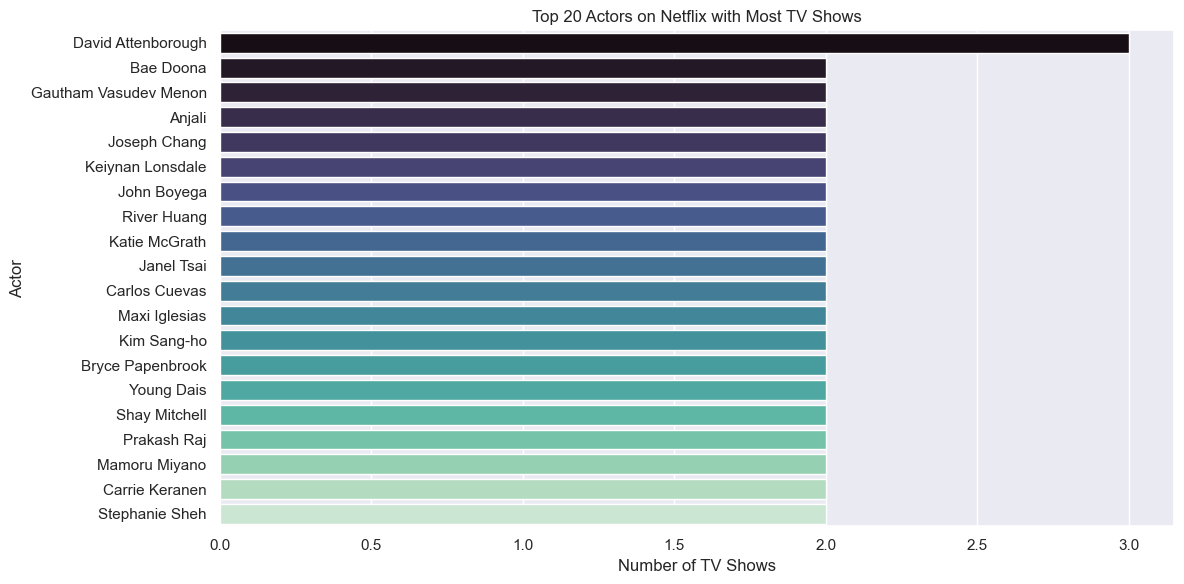

In [71]:
# Get actors with the most TV Shows on Netflix
tv_show_actors = df[df['type'] == 'TV Show']['cast'].dropna().str.split(', ').explode()
top_tv_show_actors = tv_show_actors.value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top_tv_show_actors.values, y=top_tv_show_actors.index, palette='mako')
plt.xlabel('Number of TV Shows')
plt.ylabel('Actor')
plt.title('Top 20 Actors on Netflix with Most TV Shows')
plt.tight_layout()
plt.show()